In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train.shape
# Entrainement image 32 x 32 ; 3 : rgb channels ; 50 000 : nb images train

(50000, 32, 32, 3)

In [3]:
X_test.shape
# Test image 32 x 32 ; 3 : rgb channels ; 10 000 : nb images test

(10000, 32, 32, 3)

In [4]:
X_train[0] # 3 dimensional array

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
#y_train.shape  50 000 sample 1 dimensional array
# 6 <-> frog ; 9 <-> truck ; 4 <-> deer ; 1 <-> automobile

# 5 premiers éléments y_train[:5]
# on remarque que chq élément est imbriqué dans un array exemple :  [[6],[9],...] et non [6,9,...] 

# il faut pour cela redimensionner via reshape(-1,) pour 1 dim array
y_train=y_train.reshape(-1,)

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
# classe 10 éléments 0 à 9
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
classes[9]

'truck'

In [13]:
def plot_sample(X,y, index):
# redim taille image
    plt.figure(figsize = (15,2))
# voir à quoi ressemble une image
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

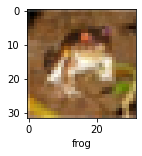

In [14]:
plot_sample(X_train,y_train,0)

# plot_sample(X_train,y_train,1)

In [16]:
# Normalizer data
X_train = X_train/255
X_test = X_test/255

In [17]:
# Construisons le modèle

# input image 32 x 32 x 3
#  2 deep layers : 1rst deep layer with 3000 neurons, 2nd deep layer 1000 neurons avc fct relu
# Last layer : 10 neurons avec fct sigmoid <-> 10 categories de notre classes 'classes'

# sigmoïd <-> s(z_k) = 1/ (1+ e^(-z_k))

ann = models.Sequential(
[
    layers.Flatten(input_shape= (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

# SGD <-> Gradient stochastique  ;   fct de perte = entropie croisée parsemé par catégorie
# Mesure <-> precision

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# on entraine les neurons
ann.fit(X_train,y_train, epochs=5)

# accuracy faible 49.5% sur samples train ;    loss : 1.4320


Epoch 1/5
1563/1563 [==============================] - 162s 103ms/step - loss: 1.8144 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.6249 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.5422 - accuracy: 0.4550
Epoch 4/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4784 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.4320 - accuracy: 0.4959s - loss: 1.4317 - accura


In [18]:
# Evaluons notre modèle sur les données test
ann.evaluate(X_test, y_test)
# accuracy : 46 % => performance mauvaise

#ANN : Artificial Neural Network 
#=> Trop de calcul , traite pixel locaux comme des pixels à  part entière

#Grosse image 1920 x 1080 x 3
#=> 6 x 10^(6) first layer neurones enormes


313/313 [==============================] - 10s 32ms/step - loss: 1.4886 - accuracy: 0.4667


[1.4885586500167847, 0.4666999876499176]

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred =ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# 
# Recal = TruePositives / (TruePositives + FalseNegatives)
# hausse Recal => minimise faux négatif

# Mesure F = (2 * Précision * Rappel) / (Précision + Rappel)
# Mesure F ~ 0 => precision + rappel médiocre
# Mesure F1 ~ 1 => précision + rappel excellent

# Precision = TruePositives / (TruePositives + FalsePositives)
# hausse Precision => minimise faux positif

# Classification report ANN

print("Classfication Report \n", classification_report( y_test, y_pred_classes))

Classfication Report 
               precision    recall  f1-score   support

           0       0.52      0.58      0.55      1000
           1       0.78      0.31      0.44      1000
           2       0.38      0.40      0.39      1000
           3       0.29      0.57      0.38      1000
           4       0.47      0.32      0.38      1000
           5       0.49      0.19      0.27      1000
           6       0.56      0.46      0.51      1000
           7       0.47      0.63      0.54      1000
           8       0.55      0.68      0.60      1000
           9       0.55      0.53      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [26]:
# CNN <-> Feature Extraction + Classification

# Feature Extraction <-> (1) Convolution + Relu (oreille,yeux) -> (2) Pooling  -> (3) Convo + Relu(head,..)
# -> (4) Pooling  .. flatten
# Classification <-> Is it this category ?

# softmax <-> s(k)= e^(z_k)/ sum(e^(z_i),{i=1..n})
# relu <-> r(z_k) = max(z_k,0)

cnn = models.Sequential(
[
    #cnn
    
    # (1) Convolution + Relu
    # filters = 32 <=> on peut détecter 32 zones différentes sur l'image
    # kernel_size <=> taille du filtre ici 3 x 3
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    
    # (2) Pooling ici on choisit MaxPooling
    layers.MaxPooling2D((2,2)),
    
    # (3) + (4)
    layers.Conv2D(filters=64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [27]:
# adam <=> optimization algorithm 
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [28]:
# Entrainons model cnn
cnn.fit(X_train, y_train, epochs = 10)

# accuracy  train :  ~ 0.78

Epoch 1/10
1563/1563 [==============================] - 90s 57ms/step - loss: 1.4511 - accuracy: 0.48060s - loss:
Epoch 2/10
1563/1563 [==============================] - 91s 59ms/step - loss: 1.1111 - accuracy: 0.6141
Epoch 3/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.9913 - accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.9063 - accuracy: 0.6874
Epoch 5/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.8397 - accuracy: 0.7062
Epoch 6/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.7861 - accuracy: 0.7266
Epoch 7/10
1563/1563 [==============================] - 179s 114ms/step - loss: 0.7360 - accuracy: 0.7423
Epoch 8/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.6944 - accuracy: 0.7578
Epoch 9/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.6543 - accuracy: 0.77040s - loss: 0
Epoch 10/10
1563/1563 [=================

In [29]:
cnn.evaluate(X_test, y_test)
# accuracy ~ 70% => bonne précision

313/313 [==============================] - 7s 21ms/step - loss: 0.9218 - accuracy: 0.7072


[0.9218333959579468, 0.7071999907493591]

In [30]:
y_test= y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [32]:
# Prediction model cnn
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.1849660e-03, 1.4775555e-02, 8.0212456e-05, 6.5124017e-01,
        3.3285320e-05, 3.2431921e-01, 2.5378310e-03, 5.9979604e-05,
        1.1512998e-03, 1.6174498e-03],
       [2.9132082e-03, 6.6864401e-02, 4.1896936e-08, 3.2082914e-07,
        1.5040098e-09, 8.5426138e-10, 2.7196764e-10, 6.6308438e-08,
        9.3001688e-01, 2.0507674e-04],
       [3.9247390e-02, 4.6331063e-01, 4.6473154e-04, 5.0587892e-03,
        2.2185368e-04, 9.2929200e-05, 2.2773855e-04, 2.0831318e-03,
        4.8145610e-01, 7.8367414e-03],
       [9.6078807e-01, 8.7902658e-03, 2.2173161e-02, 5.7508936e-04,
        4.0060256e-04, 1.1097030e-05, 7.2915608e-04, 5.8617694e-05,
        6.3034417e-03, 1.7055916e-04],
       [4.4896292e-06, 1.3122446e-06, 7.6351918e-02, 3.8544808e-02,
        2.8183338e-01, 2.7896196e-03, 6.0042173e-01, 9.7365989e-07,
        5.1713992e-05, 8.1438756e-08]], dtype=float32)

In [34]:
np.argmax([12,34,67,1,2,88]) # donne l'index de la cellule où le nb est maximum

5

In [35]:
np.argmax(y_pred[0])

3

In [36]:
y_classes = [np.argmax(element) for element in y_pred]

In [37]:
# comparons 15 premières valeurs de y_pred (cnn) avec y_test pour voir ci la prediction s'effectue assez bien
y_classes[:15]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 7, 7, 9]

In [38]:
y_test[:15]


array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

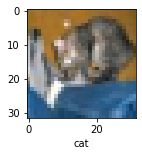

In [39]:
# visualiser la comparaison  pour voir les difficultés d'apprentissage
plot_sample(X_test,y_test,0)

In [40]:
classes[y_classes[0]]

'cat'

In [41]:
# Classification CNN
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      1000
           1       0.77      0.85      0.81      1000
           2       0.67      0.56      0.61      1000
           3       0.59      0.44      0.50      1000
           4       0.64      0.67      0.66      1000
           5       0.60      0.65      0.62      1000
           6       0.79      0.77      0.78      1000
           7       0.68      0.80      0.74      1000
           8       0.81      0.83      0.82      1000
           9       0.80      0.71      0.76      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [ ]:
# fine-tuning
